## Group8 - Lab 4 - Python

1. Gianfranco Soria (20163509)
3. Andrea Clavo (20176040)
4. Sandra Martínez (20173026)

In [1]:
import hdmpy
import numpy as np
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

## Question 1: Orthogonal Learning

1. Replicate Simulation Design 1 three times using different numbers of trials. So you have to use:

- The equation of Y for the three cases now is: Y = 5*D + beta*X + rnorm(n)
- B = 50 , B = 100, B = 1000.
- Explain what do you see in the distribution of the histograms. Where the orthogonal and Naive should be centered?
- Why does this happen? Give an econometric explanation of this.
- Label your axes and legends correctly your figures.

### Simulation Design 1

#### 1. Simulation design B=50

In [81]:
np.random.seed(0)
B = 50
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [82]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 
    # We reshape because in r when we sum a vecto with a matrix it sum by column
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )
    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]


In [83]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]

Text(0.5, 0, 'Difference between Naive-True')

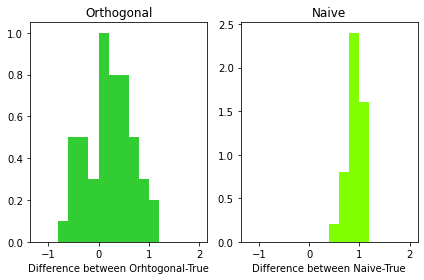

In [84]:
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 5 , range = (-2, 2), density = True , bins = Orto_breaks, color="LimeGreen" )
axs[1].hist( Naive - 5, range = (-2, 2), density = True , bins = Naive_breaks, color="Chartreuse")

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Difference between Orhtogonal-True' )
axs[1].set_xlabel( 'Difference between Naive-True' )

#### 2. Simulation design B=100

In [77]:
np.random.seed(0)
B = 100
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [78]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 
    # We reshape because in r when we sum a vecto with a matrix it sum by column
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )
    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

In [79]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]

Text(0.5, 0, 'Difference between Naive-True')

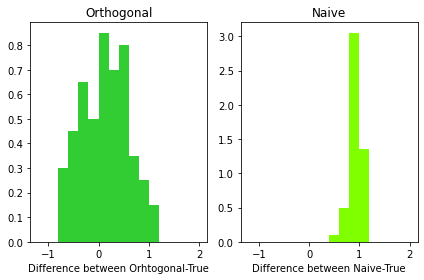

In [80]:
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 5 , range = (-2, 2), density = True , bins = Orto_breaks, color="LimeGreen" )
axs[1].hist( Naive - 5, range = (-2, 2), density = True , bins = Naive_breaks, color="Chartreuse")

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Difference between Orhtogonal-True' )
axs[1].set_xlabel( 'Difference between Naive-True' )

#### 3. Simulation design B=1000

In [72]:
np.random.seed(0)
B = 1000
Naive = np.zeros( B )
Orthogonal = np.zeros( B )


In [73]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 
    # We reshape because in r when we sum a vecto with a matrix it sum by column
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )
    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]



In [74]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]


Text(0.5, 0, 'Difference between Naive-True')

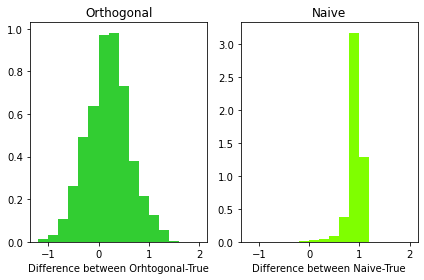

In [76]:
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 5 , range = (-2, 2), density = True , bins = Orto_breaks, color="LimeGreen" )
axs[1].hist( Naive - 5, range = (-2, 2), density = True , bins = Naive_breaks, color="Chartreuse")

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Difference between Orhtogonal-True' )
axs[1].set_xlabel( 'Difference between Naive-True' )

- #### Explain what do you see in the distribution of the histograms. Where the orthogonal and Naive should be centered?

First, in a general way, it can be observed that the histograms as the number of attempts increases, the density decreases for both approaches. In the case of the Orthogonal approach, the distribution is more centered at 0 and resembles more a normal distribution with mean 0 (large numbers theorem) and for the Naive, it is more pulled towards 1. The reason for this is because after each experiment, the estimated beta, in the case of the orthogonal approach, is very close to the real value which is 5. That is, these values for the first graph (B=50) vary between 4.5 and 5.5 and for the other two graphs (B=100 and B=1000) vary approximately between 4 and 6. On the other hand, in the Naive approach, the distribution shows that the estimated beta values are more centered on 5.5 or 6.

Therefore, using the Naive approach since it is not taking into account Neyma's Orthogonality problem cannot make inference and the beta is even biased.

- #### Why does this happen? Give an econometric explanation of this.

Remember our main equation (Double Lasso): $Y=\alpha D+\beta'W+\epsilon$

where $D$ is the target regressor and $W$ consists of $p$ controls.
After partilling-out, 

$\hat{Y}=\alpha\tilde{D}+\epsilon,E\epsilon\tilde{D}=0$

where the cariables with tilde are residuald from taking out the linear
effect of $W$ 

$\tilde{D}=D-\gamma'_{DW},$ $\gamma'_{DW}=arg$ $\underset{\gamma\epsilon R^{P}}{min}$$E(D-\gamma'W){}^{2}$

$\tilde{Y}=Y-\gamma'_{YW}$, $\gamma'_{YW}=arg$ $\underset{\gamma\epsilon R^{P}}{min}$$E(Y-\gamma'W){}^{2}$

Neyman Orthogonality 

It states that the target parameter is parameterized in terms of nuisance parameters in such away that small perturbations in terms of biased estimation of these parameters will translate to a negligible effect on estimating the target parameter.

- We have the nuisance projection parameteres:  $\eta^{0}=(\gamma'_{DW},\gamma'_{YW})'$

- The target parameter: $\alpha(\eta)$. That is, this alpha is not sensitive to gamma changes. 

- is first order insesitive to local perturbations of these parameters: 

$D=\partial_{n}\alpha(\eta^{0})=0$

The following assumption is made, the Orthogonality Principle, where
there is no correlation between the error and the explanatory variable
X.  

$M(\kappa,\eta)=E[(\tilde{Y}(\eta_{1})-\kappa\tilde{D}(\eta_{2}))\tilde{D}(\eta_{2})]=0$

where: $n:=(n'_{1},n'_{2})'=\eta^{0}:=(\gamma'_{DW},\gamma'_{YW})'$

In this case, we have defined that D is a function of the control variables (W). Then, we have regressed with double lasso to clean
up our D, so that there is no correlation and the above assumption is fulfilled. 

$\tilde{Y}(\eta_{1})=Y-\eta'_{1}W,$ $\tilde{D}(\eta_{2})=D-\eta'_{2}W$

$\tilde{Y}=Y-\gamma'_{YW},$$\tilde{D}=D-\gamma'_{DW}W$

$D=-\partial_{n}M(\alpha,\eta^{0})^{-1}\partial_{n}M(\alpha,\eta^{0})$

Partial derivatives: 

$\partial_{n_{1}}M(\alpha,\eta^{0})^{-1}=E(W\tilde{D})=0$

$\partial_{n_{2}}M(\alpha,\eta^{0})^{-1}=-E(\tilde{Y}W)+2E(\alpha\tilde{D}W)=0$


$\hat{M}(\kappa,\hat{n})=E_{n}[(\check{Y}-\kappa\check{Y})\check{D}]=0,$$\tilde{Y}=\tilde{Y}(\hat{\eta}_{1}),$$\tilde{D}=\tilde{D}(\hat{\eta}_{2})$

Neyman Orthogonality condition

$D=\partial_{n}\alpha(\eta^{0})=0,$$\partial_{n}M(\alpha,\eta^{0})=0$

Therefore, when assumption 1 is violated, the partial derivatives will be different from 0 and the $\alpha$will move as the previously
estimated $\gamma$ changes. The estimator will be biased, so inference will not be possible. 

NOTE: In the exercise performed for the histograms, our target variable is the $\beta$. In contrast, in this demonstration it is the $\alpha$


#### [General terms] Overcoming Regularization Biases using Orthogonalization.

As a lead example, consider the following partially linear regression
(PLR)

$Y=D\theta'_{0}+g_{0}(X)+U$, $E[U\mid X,D]=0$

$D=m_{0}(X)+V$,$E[V\mid X]=0$

where $Y$is the outcome variable, $D$ is the policy/treatment variable of interest,vector $X=(X_{1},...,$$X_{p})$ consists of other controls, and $U$and $V$are disturbances. The first equation is the main equation, and $\theta_{0}$ is the main regression coefficient that we would like to infer. If $D$ is exogenous conditional on controls $X$, $\theta_{0}$has the interpretation of the treatment effect (TE) parameter or  "lift" parameter in business applications. The second equation keeps track of confounding, namely the dependence of the treatment variable on controls. This equation is not of interest per se but is important for characterizing and removing regularization bias. The confounding factors $X$ affect the policy variable $D$ via the function $m_{0}(X)$ and the outcome variable via the function $g_{0}(X)$. In many applications, the dimension $\rho$ of vector $X$is large relative to $N$. To capture the feature that p is not vanishingly small relative to the sample size, modern analyses then model $\rho$ as increasing To capture the feature that p is not vanishingly small relative to the sample size, modern analyses then model p as increasing $\eta_{0}=(m_{0},g_{0})$ to fail. 

Now consider a onstruction that employs an "orthogonalized" formulation obtained by directly partialling out the effect of $X$ from $D$ to obtain the orthogonalized regressor $V=D-m_{0}(X)$. Specifically, we obtain $V=\hat{D}-\hat{m}_{0}(X)$, where $\hat{m}_{0}$ is a Machine Learning estimator of $m_{0}$ obtained using the auxiliary sample of observations. We are now solving an auxiliary prediction problem to estimate the conditional mean of $D$ given $X$, so we are doing "double prediction" or  "double machine learning".

After partialling the effect of $X$ out from $D$ and obtaining a preliminary estimate of g0 from the auxiliary sample as before, we may formulate the following "debiased" machine learning estimator for $\theta_{0}$ using the main sample of observations:

$\check{\theta}_{0}=(\frac{1}{n}\underset{i\epsilon I}{\sum}\hat{V}_{i}D_{i})^{-1}\frac{1}{n}\underset{i\epsilon I}{\sum}\hat{V}_{i}(Y_{i}-\hat{g}_{0}(X_{i}))$

By approximately orthogonalizing $D$ with respect to $X$ and approximately removing the direct effect of confounding by subtracting an estimate of $g_{0},$$\theta_{0}$removes the effect of regularization bias that contaminates. The formulation of $\check{\theta}_{0}$also provides direct links to both the classical econometric literature, as the estimator can clearly be interpreted as a linear instrumental variable (IV) estimator, and to the more recent literature on debiased lasso in the context where $g_{0}$ is taken to be well approximated by a sparse linear combination of prespecified functions of $X$.

To illustrate the benefits of the auxiliary prediction step and estimating $\theta_{0}$with $\check{\theta}_{0}$, we sketch the properties of $\check{\theta}_{0}$ here. We can decompose the scaled estimation error of $\check{\theta}_{0}$ into three components:

$\sqrt{n}(\check{\theta}_{0}-\theta_{0})=a^{*}+b^{*}+c^{*}$

The leading term, $a^{*}$, will satisfy

$a^{*}=(EV^{2})^{-1}$$\frac{1}{\sqrt{n}}\underset{i\epsilon I}{\sum}V_{i}U_{i}\rightsquigarrow N(0,\varSigma)$

under mild conditions. The second term, $b^{*}$, captures the impact of regularization bias in estimating $g_{0}$and $m_{0}.$Specifically, we will have

$b^{*}=(EV^{2})^{-1}\frac{1}{\sqrt{n}}\underset{i\epsilon I}{\sum}(\hat{m}_{0}(X_{i})-m_{0}(X_{i}))(\hat{g}_{0}(X_{i}))-g_{0}(X_{i}))$, which now depends on the product of the estimation errors in $\hat{m}_{0}$ and $\hat{g}_{0}$. Because this term depends only on the product of the estimation errors, it can vanish under a broad range of data-generating processes. Indeed, this term is upper-bounded by $\sqrt{nn}^{-(\varphi_{m}+\varphi_{g})},$where $n^{-\varphi_{m}}$and $n^{-\varphi_{g}}$are respectively the rates of convergence of $\hat{m}_{0}$to $m_{0}$ and $\hat{g}_{0}$ to $g_{0}$; ; and this upper bound can clearly vanish even though both $m_{0}$ and $g_{0}$are estimated at relatively slow rates. Verifying that $\check{\theta}_{0}$ has good properties then requires that the remainder term, $c^{*}$, is sufficiently well-behaved. 


## Double Lasso - Testing the Convergence Hypothesis

1. Explain what is the Double Lasso Approach in a markdown cell. Use equations for a better explanation.

+ Plot the main coefficient and its confidence interval of the convergence hypothesis from these 4 cases in one figure.

In [4]:
import pandas as pd

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

In [7]:
df = pd.DataFrame()
df

""


In [8]:
df['index'] = ['OLS', 'LASSO - SKLEARN', 'LASSO - HDMPY', 'LASSO - PARTIALLING OUT']
df['Estimator'] = ['-0.009378', '-0.049811', '-0.049811', '-0.049811']
df['Std. Error'] = ['-0.070600', '0.015391', '0.015391', '0.015391']
df['lower bound CI'] = ['0.051844', '-0.079978', '-0.079978', '-0.079978']
df['upper bound CI'] = ['0.051844', '-0.019644', '-0.019644', '-0.019644']
df

,index,Estimator,Std. Error,lower bound CI,upper bound CI
0,OLS,-0.009378,-0.070600,0.051844,0.051844
1,LASSO - SKLEARN,-0.049811,0.015391,-0.079978,-0.019644
2,LASSO - HDMPY,-0.049811,0.015391,-0.079978,-0.019644
3,LASSO - PARTIALLING OUT,-0.049811,0.015391,-0.079978,-0.019644


+ Explanation:

In [9]:
# making some transformation.

df["Estimator"]=df["Estimator"].astype("float64")
df["Std. Error"]=df["Std. Error"].astype("float64")
df["lower bound CI"]=df["lower bound CI"].astype("float64")
df["upper bound CI"]=df["upper bound CI"].astype("float64")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           4 non-null      object 
 1   Estimator       4 non-null      float64
 2   Std. Error      4 non-null      float64
 3   lower bound CI  4 non-null      float64
 4   upper bound CI  4 non-null      float64
dtypes: float64(4), object(1)
memory usage: 288.0+ bytes


In [11]:
# calculating the errors
errors=df["Estimator"]-df["lower bound CI"]
errors

df["errors"]=errors

In [12]:
# final database 
df

,index,Estimator,Std. Error,lower bound CI,upper bound CI,errors
0,OLS,-0.009378,-0.070600,0.051844,0.051844,-0.061222
1,LASSO - SKLEARN,-0.049811,0.015391,-0.079978,-0.019644,0.030167
2,LASSO - HDMPY,-0.049811,0.015391,-0.079978,-0.019644,0.030167
3,LASSO - PARTIALLING OUT,-0.049811,0.015391,-0.079978,-0.019644,0.030167


<ipython-input-13-740ab04250cd>:21: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(df.shape[0]),


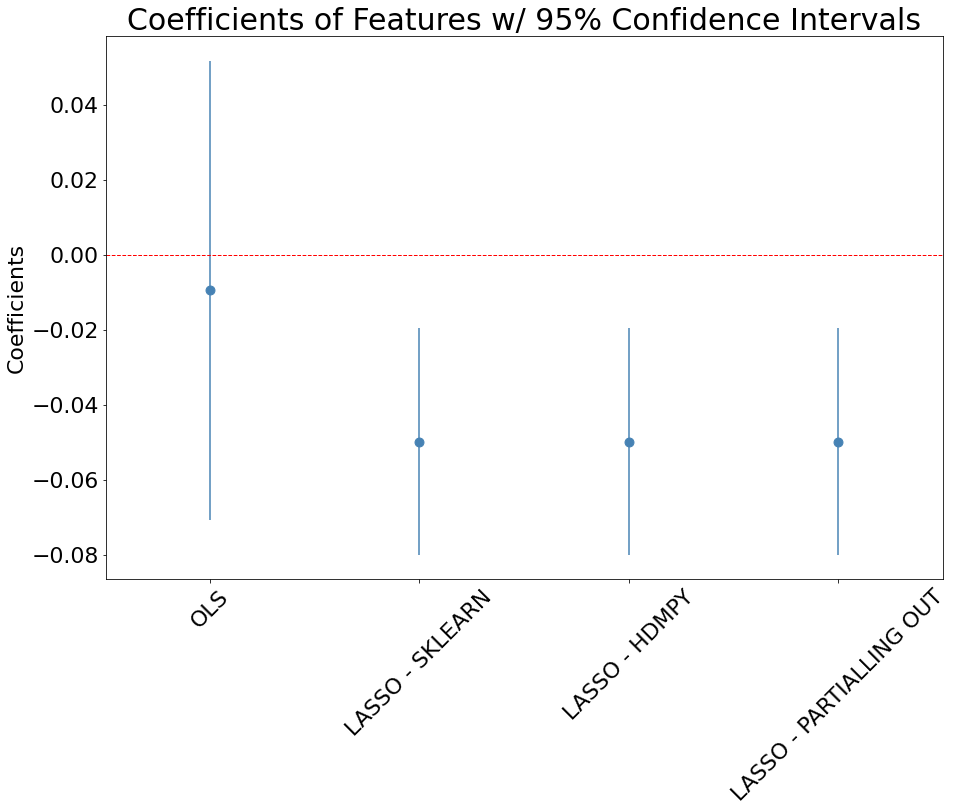

In [13]:
# lets plot !

fig, ax = plt.subplots(figsize=(15, 10))
    
# Error bars for 95% confidence interval
# Can increase capsize to add whiskers

df.plot(x='index', y='Estimator', kind='bar',
            ax=ax, color='none', fontsize=22, 
            ecolor='steelblue',capsize=0,
            yerr='errors', legend=False)

# Set title & labels
plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
ax.set_ylabel('Coefficients',fontsize=22)
plt.xticks(rotation=45)
ax.set_xlabel('',fontsize=22)


# Coefficients
ax.scatter(x=pd.np.arange(df.shape[0]), 
         marker='o', s=80, 
         y=df['Estimator'], color='steelblue')


# Line to define zero on the y-axis
ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
plt.show()


In that graphic shows the coefficients **OLS** , **LASSO-SKLEARN** , **LASSO-HDMPY** and **LASSO-PARTIALLING OUT** with a 95%
  confidence intervals. 


  * Firstly, the **OLS** coefficient shows there is a 0.9 % less likely from  convergence hypothesis. Also, the coefficient is not significative.

  * Secondly, the **LASSO-SKLEARN** coefficient shows there is a 0.4 % less likely from convergence hypothesis. Also, the coefficient is  significative.

  * Thirdly, the **LASSO-HDMPY** coefficient shows there is a a 0.4 % less likely from convergence hypothesis. Also, the coefficient is  significative.

  * Finally, the **LASSO-PARTIALLING OUT** coefficient shows there is a 0.4 % less likely from  convergence hypothesis. Also, the coefficient is  significative. 